# Gradient Descent
gradient descent 방법을 적용하여 다음 함수의 최저점을 구하여라.
$$ f(x) = \frac{1}{2}x^4 -3 x^3 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

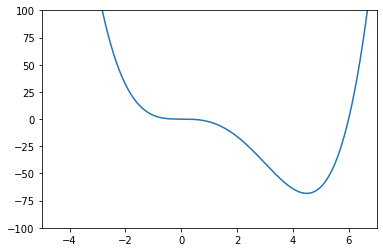

In [2]:
x = np.arange(-10,10,0.01)
def f(x):
    return 0.5*x**4 - 3*x**3
plt.ylim(-100,100)
plt.xlim(-5,7)
plt.plot(x,f(x))

In [3]:
def diff_f(x):
    return 2*x**3-9*x**2
x_old = -4
x_new = 5
d = 0.00001
P = 0.0000001

In [4]:
while abs(x_new - x_old) > P:
    x_old = x_new
    x_new = x_old - d * diff_f(x_old)

print(x_new,f(x_new))

4.500246776472067 -68.34374876671265


# Diabetes (regression)
다음의 당뇨 데이터를 회귀 분석하여라. 나이, BMI, 혈압, Y (당뇨병 진행 정도) 데이터를 이용하여라.
 1. sklearn을 이용하지 않고 (자신의 코드로)
 2. sklearn을 이용해서

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [6]:
diabetes=datasets.load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [7]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

In [8]:
X_age=diabetes.data[:,0] # 나이 
X_bmi=diabetes.data[:,2] # BMI 
X_p=diabetes.data[:,3] # 혈압 
Y = diabetes.target

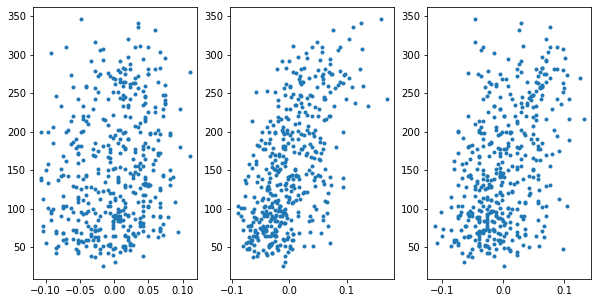

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.plot(X_age,Y,'.')
plt.subplot(132)
plt.plot(X_bmi,Y,'.')
plt.subplot(133)
plt.plot(X_p,Y,'.')

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [11]:
X_age=diabetes.data[:,0] # 나이 
X_bmi=diabetes.data[:,2] # BMI 
X_p=diabetes.data[:,3] # 혈압 
Y = diabetes.target

In [12]:
a1,a2,a3,b1,b2,b3=1,1,1,1,1,1
d = 0.1
def f1(a, b, X):
    return a*X_age + b
def f2(a, b, X):
    return a*X_bmi + b
def f3(a, b, X):
    return a*X_p + b
def F1(a1, b1):
    G1 = f1(a1, b1, X_age)
    return np.mean((Y-G1)**2)
def F2(a2, b2):
    G2 = f2(a2, b2, X_bmi)
    return np.mean((Y-G2)**2)
def F3(a3, b3):
    G3 = f3(a3, b3, X_p)
    return np.mean((Y-G3)**2)

In [13]:
n=0 
while n<10000:
    if F1(a1+d,b1) > F1(a1,b1):
        a1 = a1 - d
    else:
        a1 = a1 + d
    if F1(a1,b1 + d) > F1(a1,b1):
        b1 = b1 - d
    else:
        b1 = b1 + d
    n = n + 1
print(a1,b1)

304.20000000000067 151.99999999999565


In [14]:
n=0 
while n<10000:
    if F2(a2 + d,b2) > F2(a2,b2):
        a2 = a2 - d
    else:
        a2 = a2 + d
    if F2(a2,b2 + d) > F2(a2,b2):
        b2 = b2 - d
    else:
        b2 = b2 + d
    n = n + 1
print(a2,b2)

949.4000000001473 151.99999999999565


In [15]:
n=0 
while n<10000:
    if F3(a3 + d,b3) > F3(a3,b3):
        a3 = a3 - d
    else:
        a3 = a3 + d
    if F3(a3,b3 + d) > F3(a3,b3):
        b3 = b3 - d
    else:
        b3 = b3 + d
    n = n + 1
print(a3,b3)

714.6000000000939 151.99999999999565


Text(0.5, 1.0, 'age')

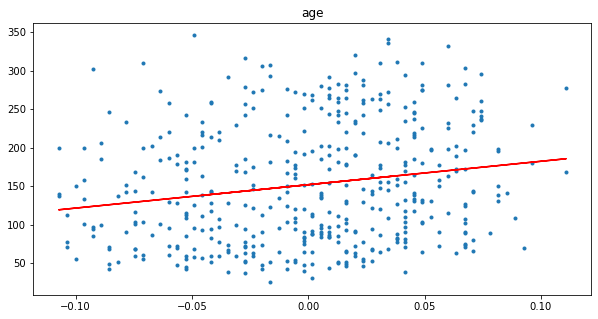

In [16]:
plt.figure(figsize=(10,5))
plt.plot(X_age,Y,'.')
plt.plot(X_age,f1(a1, b1, X_age),color="red")
plt.title("age")

Text(0.5, 1.0, 'bmi')

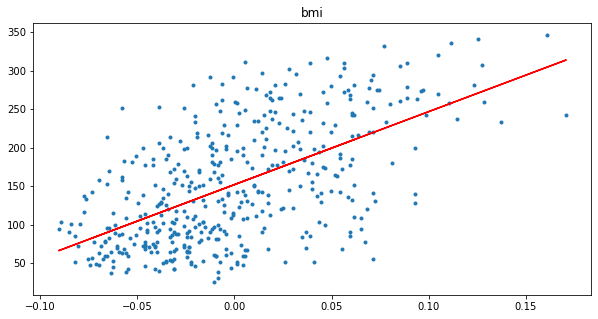

In [17]:
plt.figure(figsize=(10,5))
plt.plot(X_bmi,Y,'.')
plt.plot(X_bmi,f2(a2, b2, X_bmi),color="red")
plt.title("bmi")

Text(0.5, 1.0, '')

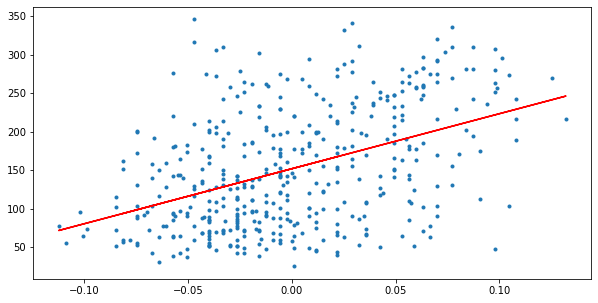

In [18]:
plt.figure(figsize=(10,5))
plt.plot(X_p,Y,'.')
plt.plot(X_p,f3(a3,b3,X_p),color="red")
plt.title("")

In [19]:
R = LinearRegression()

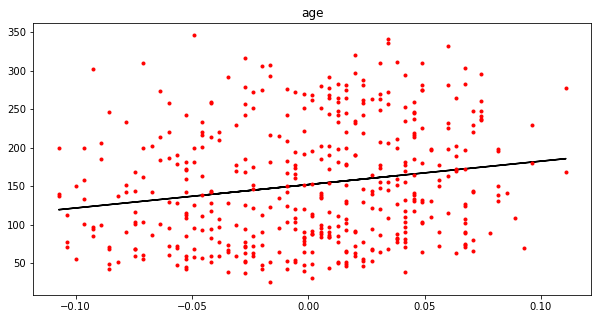

In [20]:
R.fit(X_age.reshape(-1,1),Y)
plt.figure(figsize=(10,5))
plt.plot(X_age,R.predict(X_age.reshape(-1,1)), color="black")
plt.plot(X_age,Y,'.', color="red")
plt.title("age")
plt.show()

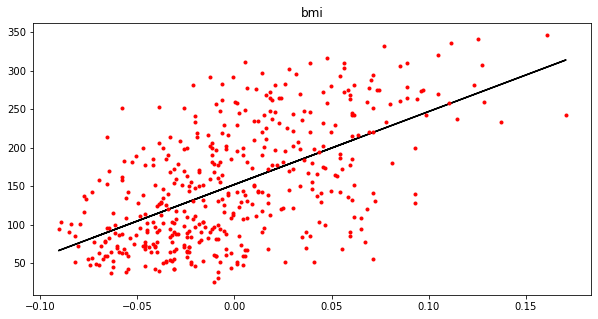

In [21]:
R.fit(X_bmi.reshape(-1,1),Y)
plt.figure(figsize=(10,5))
plt.plot(X_bmi,R.predict(X_bmi.reshape(-1,1)), color="black")
plt.plot(X_bmi,Y,'.', color="red")
plt.title("bmi")
plt.show()

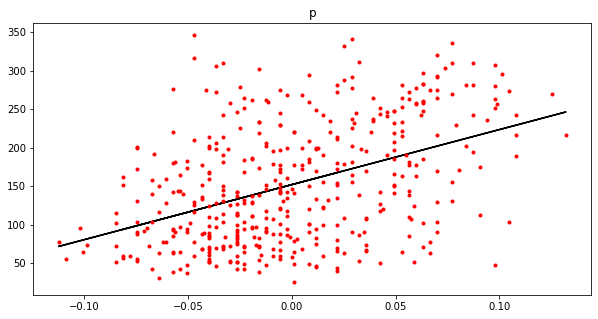

In [22]:
R.fit(X_p.reshape(-1,1),Y)
plt.figure(figsize=(10,5))
plt.plot(X_p,R.predict(X_p.reshape(-1,1)), color="black")
plt.plot(X_p,Y,'.', color="red")
plt.title("p")
plt.show()

Text(0.5, 1.0, 'p')

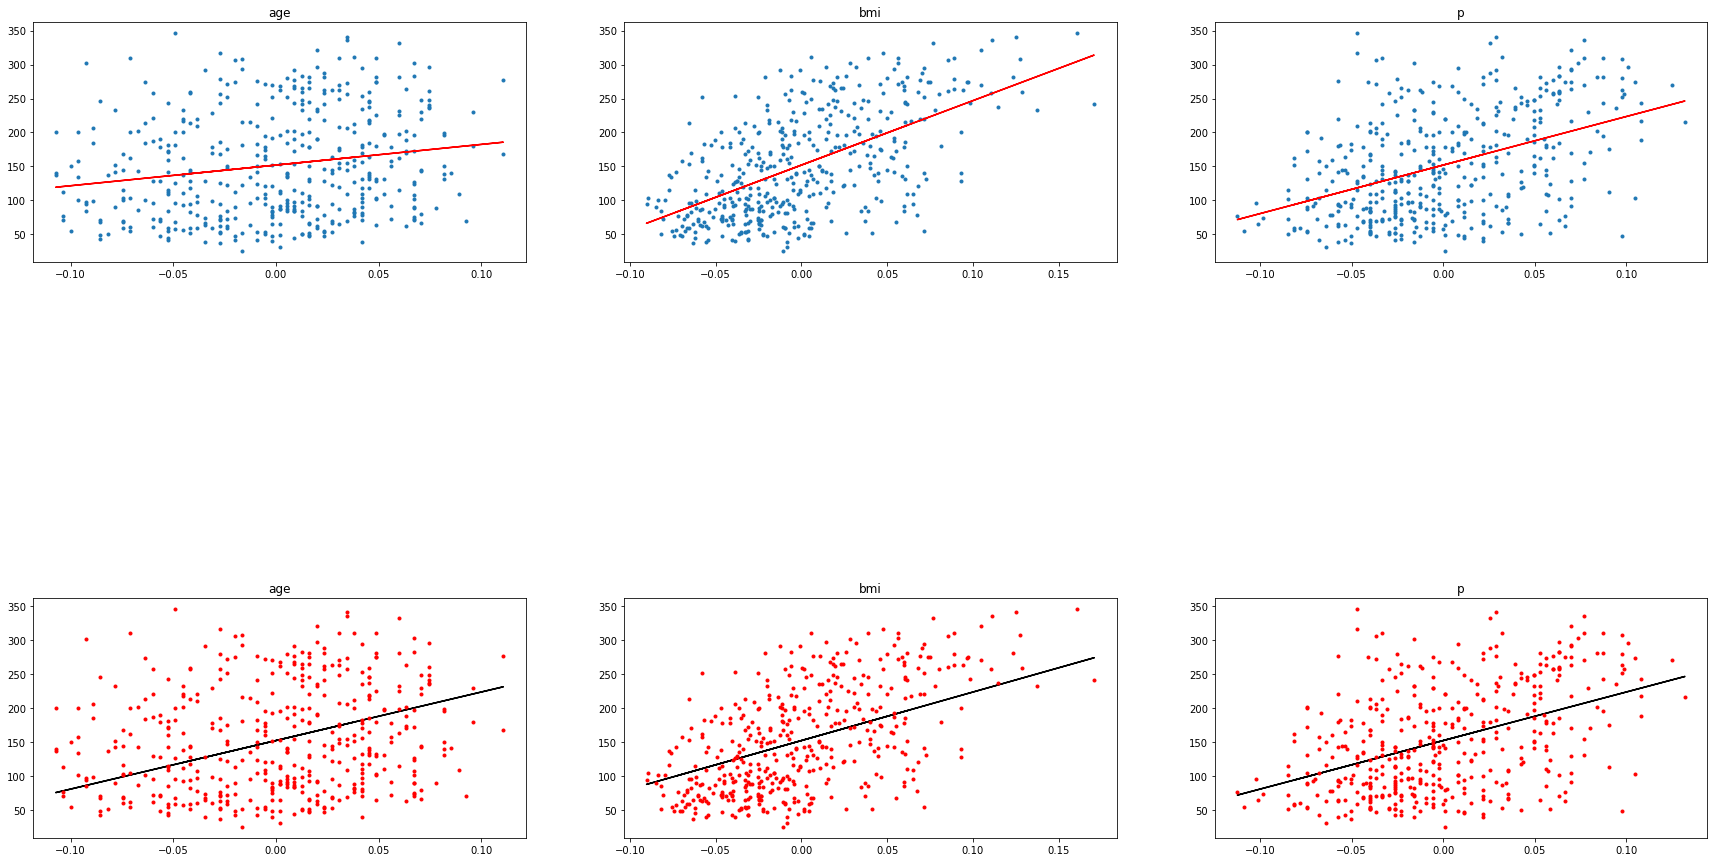

In [23]:
plt.figure(figsize=(30,15))

plt.subplot(331)
plt.plot(X_age,Y,'.')
plt.plot(X_age,f1(a1, b1, X_age),color="red")
plt.title("age")
plt.subplot(332)
plt.plot(X_bmi,Y,'.')
plt.plot(X_bmi,f2(a2, b2, X_bmi),color="red")
plt.title("bmi")
plt.subplot(333)
plt.plot(X_p,Y,'.')
plt.plot(X_p,f3(a3,b3,X_p),color="red")
plt.title("p")
plt.subplot(337)
plt.plot(X_age,R.predict(X_age.reshape(-1,1)), color="black")
plt.plot(X_age,Y,'.', color="red")
plt.title("age")
plt.subplot(338)
plt.plot(X_bmi,R.predict(X_bmi.reshape(-1,1)), color="black")
plt.plot(X_bmi,Y,'.', color="red")
plt.title("bmi")
plt.subplot(339)
plt.plot(X_p,R.predict(X_p.reshape(-1,1)), color="black")
plt.plot(X_p,Y,'.', color="red")
plt.title("p")